In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [18]:
df['Year_old'] = 2021 - df['Year']
df = df.drop(['Car_Name','Year'],axis=1)

In [19]:
df = pd.get_dummies(df,drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


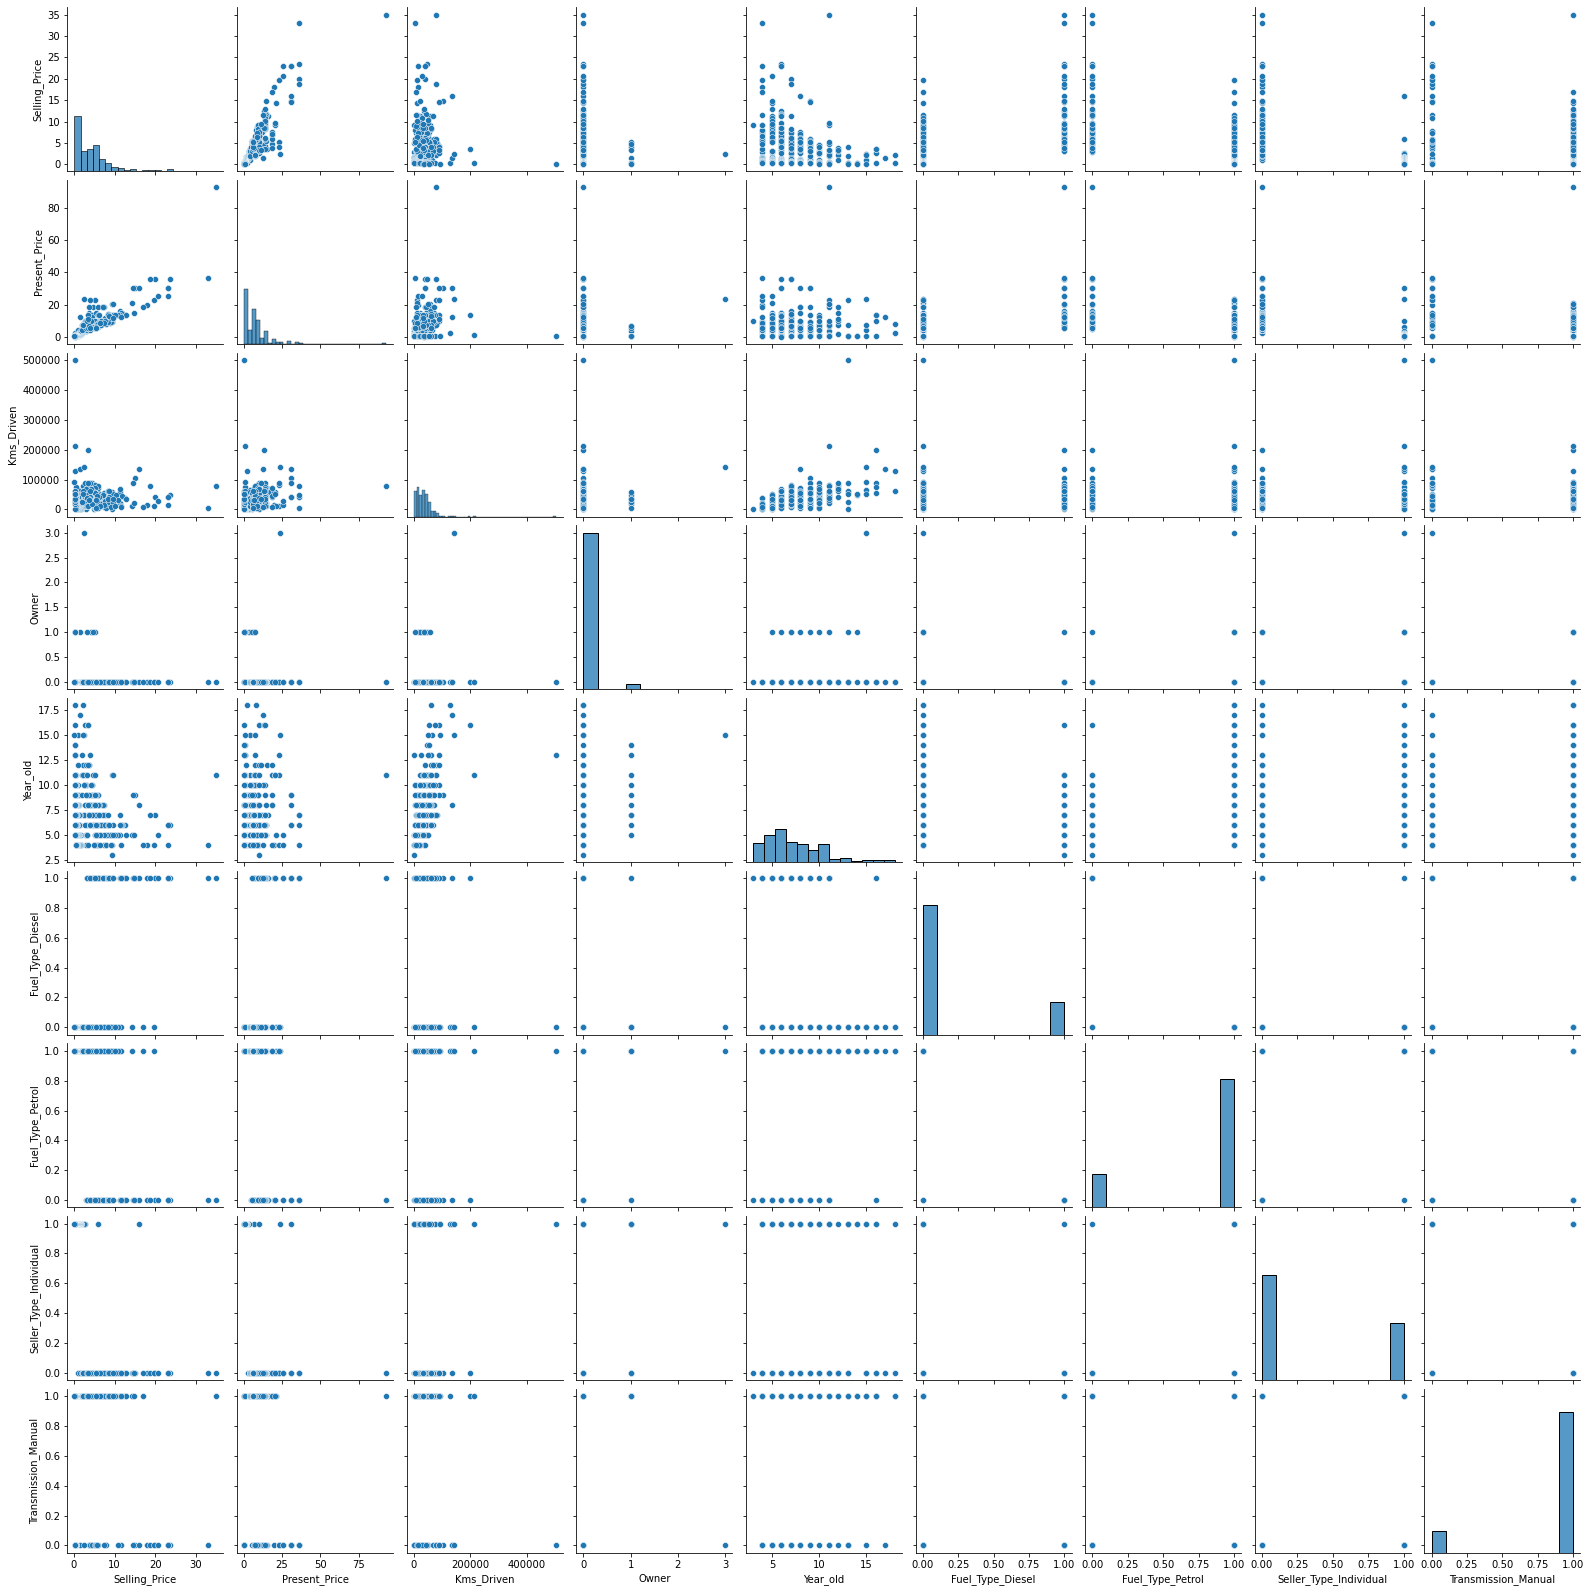

In [21]:
 sns.pairplot(df)

<AxesSubplot:>

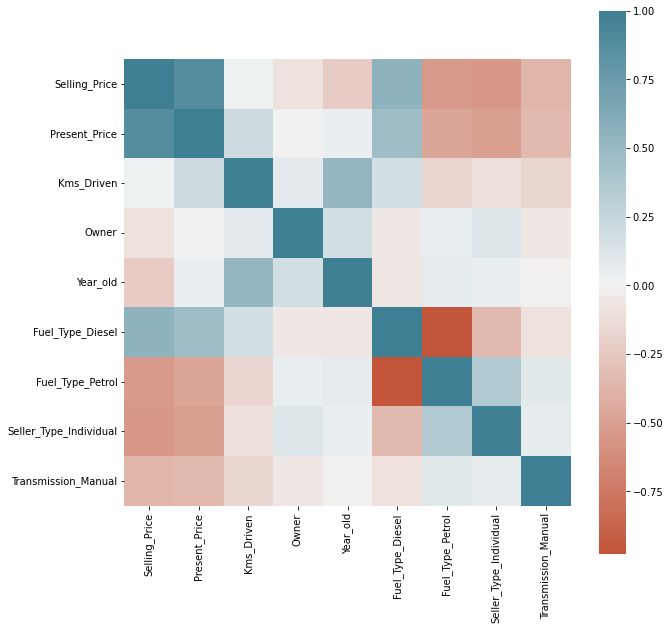

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),square=True,cmap=sns.diverging_palette(20,220,n=200))

In [33]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']
print(X.shape)
print(y.shape)

(301, 8)
(301,)


In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
model.feature_importances_

array([3.62174731e-01, 4.44171446e-02, 3.45344013e-04, 7.26395876e-02,
       2.40178941e-01, 6.88750574e-03, 1.36075349e-01, 1.37281396e-01])

<AxesSubplot:>

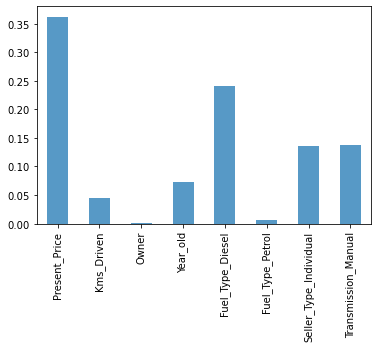

In [38]:
pd.Series(model.feature_importances_,index=X.columns).plot(kind='bar',alpha=0.75,rot=90)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.914434297222852

In [43]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [44]:
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.9144343 , 0.81157191, 0.82958652, 0.84584462, 0.85555828])

In [45]:
from sklearn.tree import DecisionTreeRegressor 
final_model = DecisionTreeRegressor(splitter='best',min_samples_leaf=2,max_depth=15,criterion='mae')
final_model.fit(X_train,y_train)
final_model.score(X_test,y_test)

0.9468648408838095

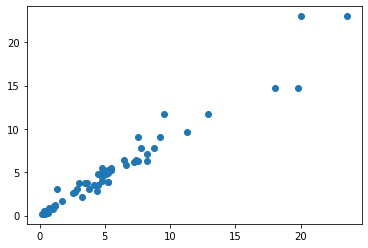

In [46]:
prediction = final_model.predict(X_test)
plt.scatter(y_test,prediction)

In [48]:
import pickle
with open('RF_price_predicting_model.pkl','wb') as file:
    pickle.dump(final_model,file)